<a href="https://colab.research.google.com/github/Manoj250/Housing-price-prediction-using-deep-learning/blob/main/Housing_price_prediction_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [120]:
x = pd.DataFrame(boston.data)
x.head()
x.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [121]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [122]:
y = pd.DataFrame(boston.target)
print(y.head(),"\n")
y.isnull().sum()

      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2 



0    0
dtype: int64

In [123]:
x = x.values
type(x)

numpy.ndarray

In [124]:
x.shape

(506, 13)

In [125]:
y = y.values
y.shape

(506, 1)

In [126]:
from sklearn.preprocessing import StandardScaler
import numpy as np

full_data = np.append(x,y,axis=1)
scaler = StandardScaler()
model = scaler.fit(full_data)
scaled_data = model.transform(full_data)

In [127]:
x = scaled_data[:,0:13]
y = scaled_data[:,-1]

In [128]:
print(x.shape,y.shape)

(506, 13) (506,)


In [129]:
x_train =  x[0:400,:]
y_train = y[0:400]
x_test= x[400:,:]
y_test = y[400:]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(400, 13) (400,) (106, 13) (106,)


In [141]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

early_stop = EarlyStopping(monitor='loss',mode='min', patience=10)

model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')


In [142]:
model.fit(x_train, y_train, epochs=100, callbacks=[early_stop],validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 10ms/step - loss: 0.7622 - val_loss: 0.5648
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5584 - val_loss: 0.3705
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4476 - val_loss: 0.2339
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3936 - val_loss: 0.1929
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3518 - val_loss: 0.1849
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3182 - val_loss: 0.1858
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2977 - val_loss: 0.1767
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2752 - val_loss: 0.1673
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2569 - val_loss: 0.1573
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2464 - val_loss: 0.1613
Epoch 11

Text(0.5, 1.0, 'Visualizing Residuals with Scatter Plot')

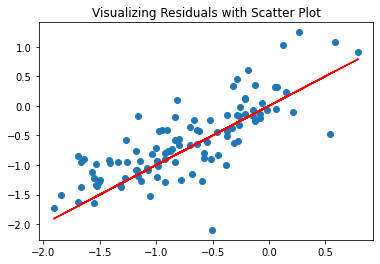

In [144]:
import matplotlib.pyplot as plt
predictions = model.predict(x_test)
np_arr_predictions = np.array([x[0] for x in predictions])
errors = y_test - np_arr_predictions
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.title("Visualizing Residuals with Scatter Plot")
#red line is actual value and blue scatters are predicted values 